# Hamiltonian Monte Carlo

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## Observations

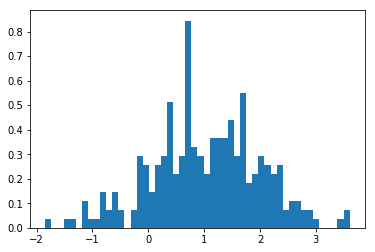

In [2]:
num_observations = 250
theta_true = 1.


N = torch.distributions.normal.Normal(theta_true, 1.)
observations = N.sample(torch.Size([num_observations])).view(-1)

plt.hist(observations.numpy(), bins=50, density=True)
plt.show()

## Posterior inference with Hamiltonian Monte Carlo

In [3]:
def log_likelihood(theta, observations):
    N = torch.distributions.normal.Normal(theta, 1.)
    likelihood = N.log_prob(observations).sum()
        
    return likelihood

In [4]:
from hypothesis.inference import HamiltonianMonteCarlo

leapfrog_steps = 50
leapfrog_stepsize = .01
momentum = torch.distributions.normal.Normal(0, 1)
sampler = HamiltonianMonteCarlo(log_likelihood, leapfrog_steps, leapfrog_stepsize)

In [5]:
theta_0 = torch.tensor(5).float()
result = sampler.infer(
    observations,
    theta_0=theta_0,
    samples=5000,
    burnin_steps=1000)

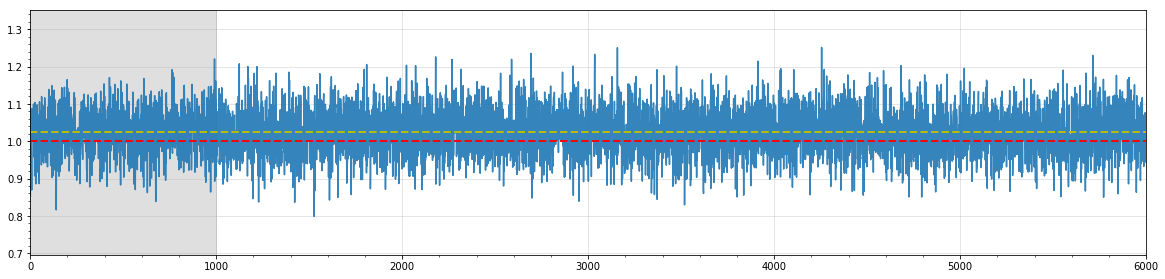

In [6]:
from hypothesis.visualization.mcmc import plot_trace
from hypothesis.visualization.mcmc import plot_autocorrelation

figure_height = 20
figure_width = 20
fig, axes = plot_trace(result, truth=theta_true, aspect=6, show_burnin=True, show_mean=True)
fig.set_figheight(figure_height)
fig.set_figwidth(figure_width)
plt.show()

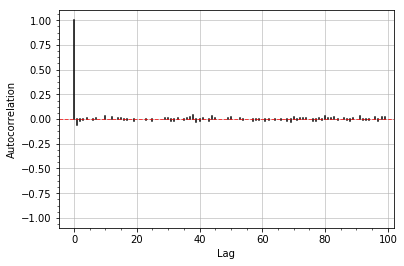

In [7]:
plot_autocorrelation(result, max_lag=100, interval=1)
plt.show()

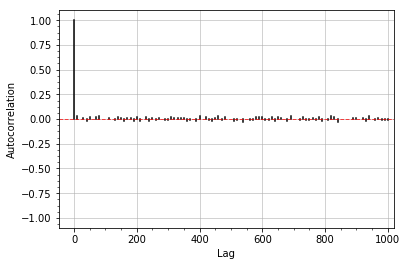

In [8]:
plot_autocorrelation(result, max_lag=1000, interval=10)
plt.show()

In [9]:
effective_size = result.effective_size()

effective_size

1666

In [10]:
result.efficiency()

0.3332

In [11]:
thinned_chain = result.thin()

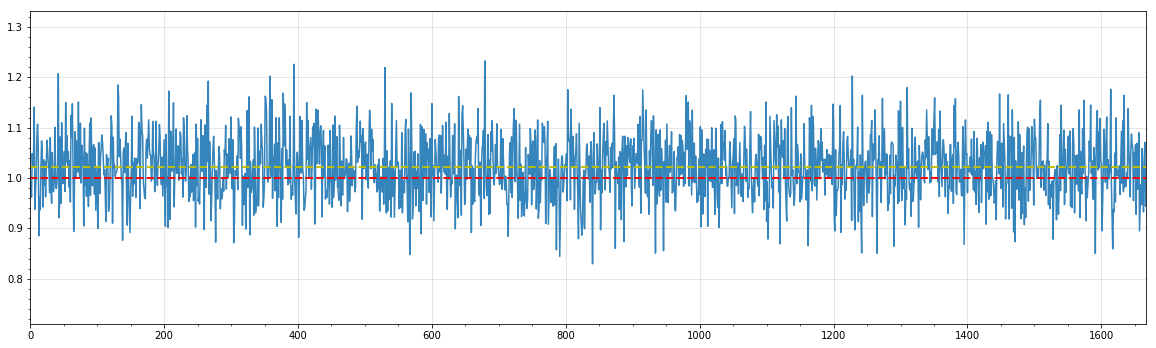

In [12]:
fig, axes = plot_trace(thinned_chain, truth=theta_true, aspect=5, show_burnin=True, show_mean=True)
fig.set_figheight(figure_height)
fig.set_figwidth(figure_width)
plt.show()

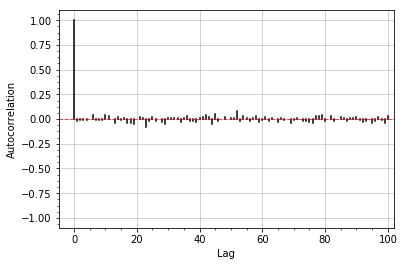

In [13]:
plot_autocorrelation(thinned_chain, max_lag=100, interval=1)

In [14]:
thinned_chain.effective_size()

555

In [15]:
thinned_chain.efficiency()

0.33293341331733656